# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [252]:

import gmaps
import numpy as np
import pandas as pd
import requests
import time
from scipy.stats import linregress
from matplotlib import pyplot as plt
from citipy import citipy
from api_keys import weather_api_key
import unittest
import random

## Generate Cities List

In [253]:
city = citipy.nearest_city(22.99, 120.21)
print(city)

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [254]:
np.random.seed(1234)
lat = np.random.uniform(-90, 91,650)
lat

lng=np.random.uniform(-180, 181,650)
lng


array([-2.03180580e+01, -4.25783739e+01,  1.20568047e+02,  7.70183489e+01,
       -5.18447019e+01, -1.71106283e+02,  7.03580193e+01, -2.79424892e+01,
        1.29864149e+02,  2.76015529e+01,  1.59362513e+02,  1.37772243e+02,
       -1.46096440e+01, -1.73751066e+02, -1.55215674e+02, -6.42605062e+01,
        3.38209812e+01,  4.02289302e+01,  4.98632871e+00, -1.27742919e+02,
        1.36527938e+02,  8.65028997e+01, -4.52313414e+01,  1.19155784e+02,
       -1.47423527e+02, -1.56894838e+02,  2.62879840e+00,  1.56967043e+02,
       -1.26224748e+02,  2.55818443e+01, -1.58430736e+02, -1.18890668e+02,
       -1.55080762e+02,  1.47074105e+02, -1.84849682e+01, -1.41594943e+02,
        6.01587800e+01,  1.32068915e+00, -3.22764961e+01,  8.28056428e+01,
       -1.17875362e+02, -4.12096181e+01, -8.36125894e+01, -6.87322646e+01,
       -1.15993688e+02, -5.79638954e+00,  4.73279077e+01, -1.58501250e+02,
       -1.08923696e+02, -7.92057549e+01,  7.55232395e+01, -6.17981002e+01,
       -2.64688502e+01,  

In [255]:
coordinates_list = list(zip(lat, lng))
coordinates_list

[(-55.3349794814205, -20.318058010150253),
 (22.601687558209562, -42.5783738622913),
 (-10.771279239712285, 120.56804734719162),
 (52.14990365219222, 77.01834890967626),
 (51.17562126950344, -51.84470191562326),
 (-40.660738443841865, -171.10628324673343),
 (-39.9599698190995, 70.35801933282124),
 (55.138864133838496, -27.942489162632455),
 (83.42322301675063, 129.86414899466854),
 (68.54380688831915, 27.601552918117108),
 (-25.23507413762613, 159.36251274005895),
 (0.680117719746022, 137.77224251570186),
 (33.70679126615667, -14.609643970504862),
 (38.99906688390493, -173.75106562090502),
 (-22.98461338293852, -155.21567446144198),
 (11.576509677878107, -64.2605061741817),
 (1.058052920713564, 33.82098116204179),
 (-87.50791062408652, 40.22893023270166),
 (49.88161851183969, 4.986328713939855),
 (69.7580555051371, -127.74291853918626),
 (-23.95563691385162, 136.52793824628094),
 (21.38670829646236, 86.50289968147706),
 (-76.35599526262125, -45.23134141468009),
 (-23.242854913642617, 1

In [256]:
cities_names = []
countrycode = []
#loop through the generated coordinates and get nearby cities from citipy
for i, j in coordinates_list:
    city=citipy.nearest_city(i, j)
    name=city.city_name
    cities_names.append(name)
    country=city.country_code
    countrycode.append(country)

cities_names
countrycode

['br',
 'cv',
 'id',
 'kz',
 'ca',
 'to',
 'mu',
 'is',
 'ru',
 'fi',
 'au',
 'id',
 'pt',
 'us',
 'pf',
 've',
 'ug',
 'za',
 'be',
 'ca',
 'au',
 'in',
 'ar',
 'au',
 'us',
 'us',
 'sh',
 'ru',
 'pf',
 'sd',
 'us',
 'pf',
 'us',
 'au',
 'pt',
 'us',
 'mg',
 'sj',
 'br',
 'ru',
 'cl',
 'ar',
 'ar',
 'bm',
 'mx',
 'ci',
 'za',
 'us',
 'pf',
 'ec',
 're',
 'ai',
 'cv',
 'au',
 'mx',
 'gl',
 'ru',
 'ru',
 'gl',
 'ru',
 'mg',
 'in',
 'lk',
 'nz',
 'pe',
 'pf',
 'ec',
 'us',
 're',
 'au',
 'ru',
 'ml',
 'ga',
 'cl',
 'pf',
 'ru',
 'pf',
 'my',
 'au',
 'na',
 'pg',
 'cv',
 'ca',
 'qa',
 'pt',
 'za',
 'pt',
 'ru',
 'ki',
 'ao',
 'au',
 'mx',
 'wf',
 'ru',
 'cg',
 'id',
 'my',
 'ru',
 'za',
 'us',
 'ru',
 'ca',
 'ru',
 'dj',
 'gl',
 'cl',
 'ar',
 'pg',
 'mg',
 'us',
 'za',
 'pf',
 'tv',
 'ru',
 'ru',
 'uy',
 'br',
 'au',
 'ca',
 'tm',
 'pt',
 'ru',
 'us',
 'pw',
 'au',
 'au',
 'cl',
 'bs',
 'mg',
 'za',
 'nz',
 'sa',
 'ca',
 'au',
 'au',
 'pf',
 'ru',
 'to',
 'au',
 'pw',
 'au',
 'ru',
 'gl',

In [257]:
#form a dic from the above data set
city_country_dic = {'Latitude':lat,'Longitude':lng, 'City': cities_names , 'Country': countrycode}
city_country_dic

{'Latitude': array([-55.33497948,  22.60168756, -10.77127924,  52.14990365,
         51.17562127, -40.66073844, -39.95996982,  55.13886413,
         83.42322302,  68.54380689, -25.23507414,   0.68011772,
         33.70679127,  38.99906688, -22.98461338,  11.57650968,
          1.05805292, -87.50791062,  49.88161851,  69.75805551,
        -23.95563691,  21.3867083 , -76.35599526, -23.24285491,
         78.89835846,  27.89944392, -18.10633343,  52.76015587,
        -32.65266189,  12.82585613,  67.31205751, -11.05261027,
         55.18872322, -63.97820476,  37.47123577,  37.52921678,
        -50.39862887,  77.40104078,  -9.97252327,  74.58618857,
        -79.17453068, -56.64403783, -81.42869454,  32.15345079,
         17.62708517,   6.5291395 , -82.15834465,  11.61938749,
        -30.33001134,   1.03699679, -69.74712852,  19.90206083,
         12.43598039, -88.77570478,  21.75694929,  75.09424244,
         53.08486808,  89.56674538,  83.54311895,  53.34550849,
        -38.36957624,  23.10

In [258]:
#form a df with above dic
df = pd.DataFrame(city_country_dic, columns=['Latitude','Longitude', 'City', 'Country'])
df.head()

Latitude   Longitude             City Country
0 -55.334979  -20.318058  arraial do cabo      br
1  22.601688  -42.578374     ponta do sol      cv
2 -10.771279  120.568047         waingapu      id
3  52.149904   77.018349             aksu      kz
4  51.175621  -51.844702        bonavista      ca

In [259]:
#create new empty columns
df[["Max Temp (F)", "Humidity","Cloudiness", "Wind Speed (mph)", "Date (Unix Timestamp)"]]=""
#df
max_temp =[]
cloudiness = []
wind_speed = []
date = []
df

Latitude   Longitude             City Country Max Temp (F) Humidity  \
0   -55.334979  -20.318058  arraial do cabo      br                         
1    22.601688  -42.578374     ponta do sol      cv                         
2   -10.771279  120.568047         waingapu      id                         
3    52.149904   77.018349             aksu      kz                         
4    51.175621  -51.844702        bonavista      ca                         
..         ...         ...              ...     ...          ...      ...   
645  89.362840  153.065920       chokurdakh      ru                         
646 -88.914381 -118.585849     punta arenas      cl                         
647 -29.319655   79.335822  bambous virieux      mu                         
648  52.855718  133.996948     zlatoustovsk      ru                         
649 -72.169416 -133.319178          rikitea      pf                         

    Cloudiness Wind Speed (mph) Date (Unix Timestamp)  
0                                                      
1                                                      
2                                                      
3                                                      
4                                                      
..         ...              ...                   ...  
645                                                    
646                                                    
647                                                    
648                                                    
649                                                    

[650 rows x 9 columns]

In [260]:
#obtain API key
api_key = weather_api_key

#obtain URL
url = "http://api.openweathermap.org/data/2.5/weather?q="





#putting together API call for : api.openweathermap.org/data/2.5/weather?q={city name},{state code}&appid={API key}

humidities = []
max_temp = []
cloudiness =[]
wind_speed = []
date = []
#for row in df.itertuples(index=False):         
for index, row in df.iterrows():
    
    try:
        cities_weather = requests.get(url+row["City"]+","+row["Country"]+"&units=imperial&appid="+api_key).json()
#        print(cities_weather["main"]["humidity"])
#        max_temp.append(cities_weather["main"]["temp_max"]) 
        humidities.append(cities_weather["main"]["humidity"])
        max_temp.append(cities_weather["clouds"]["all"])
        cloudiness.append(cities_weather["clouds"]["all"])
        wind_speed.append(cities_weather["wind"]["speed"])
        date.append(cities_weather["dt"])
#        df.set_value(index, "Max Temp", cities_weather["main"]["temp_max"])
#       row["Humidity"]=cities_weather["main"]["humidity"]
#        df["Cloudiness"]= cities_weather["clouds"]["all"]
#        df["Wind Speed"]= cities_weather["wind"]["speed"]
#        df["Date"]= cities_weather["dt"]
    except:
        print("---------------------------s-k-i-p----------------------------------")                                                               
        humidities.append(np.nan)
        max_temp.append(np.nan)
        cloudiness.append(np.nan)
        wind_speed.append(np.nan)
        date.append(np.nan)
#df.head()
df["Humidity"]=humidities
df["Max Temp (F)"]=max_temp
df["Cloudiness"]=cloudiness
df["Wind Speed (mph)"]=wind_speed
df["Date (Unix Timestamp)"]=date
df.head()


---------------------------s-k-i-p----------------------------------
---------------------------s-k-i-p----------------------------------
---------------------------s-k-i-p----------------------------------
---------------------------s-k-i-p----------------------------------
---------------------------s-k-i-p----------------------------------
---------------------------s-k-i-p----------------------------------
---------------------------s-k-i-p----------------------------------
---------------------------s-k-i-p----------------------------------
---------------------------s-k-i-p----------------------------------
---------------------------s-k-i-p----------------------------------
---------------------------s-k-i-p----------------------------------
---------------------------s-k-i-p----------------------------------
---------------------------s-k-i-p----------------------------------
---------------------------s-k-i-p----------------------------------
---------------------------s-k-i-p

Latitude   Longitude             City Country  Max Temp (F)  Humidity  \
0 -55.334979  -20.318058  arraial do cabo      br         100.0      90.0   
1  22.601688  -42.578374     ponta do sol      cv          96.0      81.0   
2 -10.771279  120.568047         waingapu      id          90.0      63.0   
3  52.149904   77.018349             aksu      kz          75.0      92.0   
4  51.175621  -51.844702        bonavista      ca           4.0      58.0   

   Cloudiness  Wind Speed (mph)  Date (Unix Timestamp)  
0       100.0              7.38           1.643704e+09  
1        96.0              9.31           1.643704e+09  
2        90.0             18.10           1.643704e+09  
3        75.0              7.23           1.643704e+09  
4         4.0             19.71           1.643704e+09

In [263]:
df.shape



(650, 9)

In [297]:
#drop rows with NaN values since they cannot be used for further analysis
nona_df = df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)


In [296]:
nona_df.head()

Latitude   Longitude             City Country  Max Temp (F)  Humidity  \
0 -55.334979  -20.318058  arraial do cabo      br         100.0      90.0   
1  22.601688  -42.578374     ponta do sol      cv          96.0      81.0   
2 -10.771279  120.568047         waingapu      id          90.0      63.0   
3  52.149904   77.018349             aksu      kz          75.0      92.0   
4  51.175621  -51.844702        bonavista      ca           4.0      58.0   

   Cloudiness  Wind Speed (mph)  Date (Unix Timestamp)  
0       100.0              7.38           1.643704e+09  
1        96.0              9.31           1.643704e+09  
2        90.0             18.10           1.643704e+09  
3        75.0              7.23           1.643704e+09  
4         4.0             19.71           1.643704e+09

In [266]:
nona_df.shape

(565, 9)

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [298]:
#export df to csv
csv = nona_df.to_csv("../output_data/WeatherPy", encoding='utf-8', index=False)

In [299]:
nona_df.head()

Latitude   Longitude             City Country  Max Temp (F)  Humidity  \
0 -55.334979  -20.318058  arraial do cabo      br         100.0      90.0   
1  22.601688  -42.578374     ponta do sol      cv          96.0      81.0   
2 -10.771279  120.568047         waingapu      id          90.0      63.0   
3  52.149904   77.018349             aksu      kz          75.0      92.0   
4  51.175621  -51.844702        bonavista      ca           4.0      58.0   

   Cloudiness  Wind Speed (mph)  Date (Unix Timestamp)  
0       100.0              7.38           1.643704e+09  
1        96.0              9.31           1.643704e+09  
2        90.0             18.10           1.643704e+09  
3        75.0              7.23           1.643704e+09  
4         4.0             19.71           1.643704e+09

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [302]:
nona_df["Humidity"].max()
#will skip below steps since there is no city with humidity > 100%

100.0

In [303]:
#  Get the indices of cities that have humidity over 100%.
#df_humid = nona_df.loc[lambda row : row["Humidity"]>100]

In [304]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

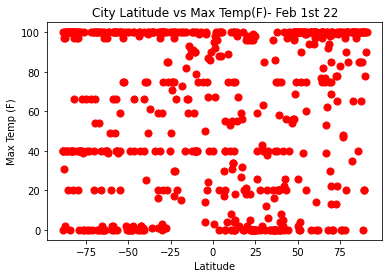

In [306]:
# Generate a scatter plot of Latitude vs Max Temp
x_axis_scatter_t = nona_df["Latitude"]
y_axis_scatter_t = nona_df["Max Temp (F)"]
plt.scatter(x_axis_scatter_t, y_axis_scatter_t, c ="red",
            linewidths = 1, 
            edgecolor ="red", 
            s = 50)
  
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.title('City Latitude vs Max Temp(F)- Feb 1st 22')
plt.show()

## Latitude vs. Humidity Plot

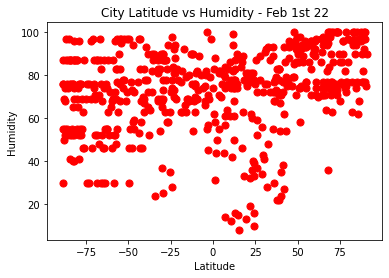

In [273]:
# Generate a scatter plot of Latitude vs Humidity
x_axis_scatter_h = nona_df["Latitude"]
y_axis_scatter_h = nona_df["Humidity"]
plt.scatter(x_axis_scatter_h, y_axis_scatter_h, c ="red",
            linewidths = 1, 
            edgecolor ="red", 
            s = 50)
  
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title('City Latitude vs Humidity - Feb 1st 22')
plt.show()

## Latitude vs. Cloudiness Plot

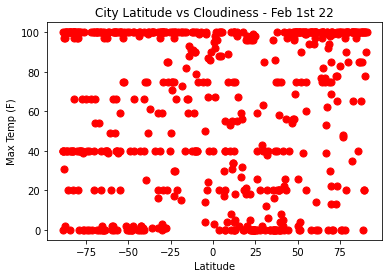

In [274]:
# Generate a scatter plot of Latitude vs Cloudiness
x_axis_scatter_c = nona_df["Latitude"]
y_axis_scatter_c = nona_df["Cloudiness"]
plt.scatter(x_axis_scatter_c, y_axis_scatter_c, c ="red",
            linewidths = 1, 
            edgecolor ="red", 
            s = 50)
  
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.title('City Latitude vs Cloudiness - Feb 1st 22')
plt.show()

## Latitude vs. Wind Speed Plot

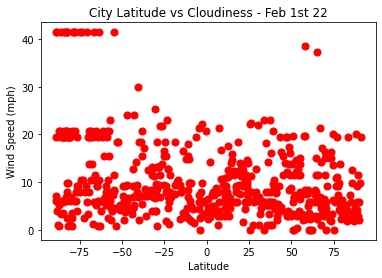

In [307]:
# Generate a scatter plot of Latitude vs Wind Speed
x_axis_scatter_w = df["Latitude"]
y_axis_scatter_w = df["Wind Speed (mph)"]
plt.scatter(x_axis_scatter_w, y_axis_scatter_w, c ="red",
            linewidths = 1, 
            edgecolor ="red", 
            s = 50)
  
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title('City Latitude vs Cloudiness - Feb 1st 22')
plt.show()

## Linear Regression

In [308]:
#  Get the indices of cities in the Northern Hemisphere
df_noh = nona_df.loc[lambda row : row["Latitude"]>0]
df_noh

Latitude   Longitude          City Country  Max Temp (F)  Humidity  \
1    22.601688  -42.578374  ponta do sol      cv          96.0      81.0   
3    52.149904   77.018349          aksu      kz          75.0      92.0   
4    51.175621  -51.844702     bonavista      ca           4.0      58.0   
7    55.138864  -27.942489     grindavik      is          75.0      74.0   
8    83.423223  129.864149         tiksi      ru         100.0     100.0   
..         ...         ...           ...     ...           ...       ...   
634  50.915821  -97.920124         gimli      ca         100.0      93.0   
635  40.400132   91.422219          hami      cn           8.0      24.0   
642  64.288402  -47.539520       paamiut      gl         100.0      91.0   
643  77.095525   79.861260        dikson      ru         100.0      90.0   
645  89.362840  153.065920    chokurdakh      ru         100.0      97.0   

     Cloudiness  Wind Speed (mph)  Date (Unix Timestamp)  
1          96.0              9.31           1.643704e+09  
3          75.0              7.23           1.643704e+09  
4           4.0             19.71           1.643704e+09  
7          75.0             14.97           1.643704e+09  
8         100.0              3.02           1.643704e+09  
..          ...               ...                    ...  
634       100.0              5.75           1.643705e+09  
635         8.0              4.41           1.643705e+09  
642       100.0              8.46           1.643704e+09  
643       100.0             19.44           1.643704e+09  
645       100.0              2.28           1.643704e+09  

[295 rows x 9 columns]

In [277]:
#  Get the indices of cities in the Southern Hemisphere
df_soh = nona_df.loc[lambda row : row["Latitude"]<0]
df_soh

Latitude   Longitude             City Country  Max Temp (F)  Humidity  \
0   -55.334979  -20.318058  arraial do cabo      br         100.0      90.0   
2   -10.771279  120.568047         waingapu      id          90.0      63.0   
5   -40.660738 -171.106283            vaini      to          40.0      83.0   
6   -39.959970   70.358019        mahebourg      mu          75.0      78.0   
17  -87.507911   40.228930      port alfred      za          97.0      74.0   
..         ...         ...              ...     ...           ...       ...   
641  -4.649641 -159.392667           faanui      pf           4.0      75.0   
644 -48.110060   -8.822993        cape town      za           0.0      46.0   
646 -88.914381 -118.585849     punta arenas      cl          40.0      76.0   
647 -29.319655   79.335822  bambous virieux      mu          75.0      78.0   
649 -72.169416 -133.319178          rikitea      pf          66.0      69.0   

     Cloudiness  Wind Speed (mph)  Date (Unix Timestamp)  
0         100.0              7.38           1.643704e+09  
2          90.0             18.10           1.643704e+09  
5          40.0              6.91           1.643704e+09  
6          75.0             18.41           1.643704e+09  
17         97.0              0.92           1.643704e+09  
..          ...               ...                    ...  
641         4.0             21.32           1.643704e+09  
644         0.0              9.22           1.643704e+09  
646        40.0             41.43           1.643704e+09  
647        75.0             18.41           1.643705e+09  
649        66.0              7.90           1.643704e+09  

[270 rows x 9 columns]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

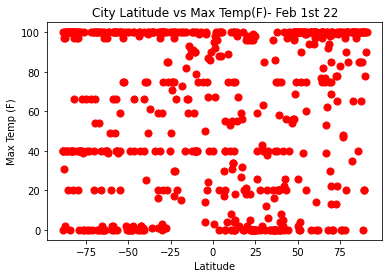

In [278]:
x_axis_scatter_tn = df_noh["Latitude"]
y_axis_scatter_tn = df_noh["Max Temp (F)"]
plt.scatter(x_axis_scatter_t, y_axis_scatter_t, c ="red",
            linewidths = 1, 
            edgecolor ="red", 
            s = 50)
  
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.title('City Latitude vs Max Temp(F)- Feb 1st 22')
plt.show()

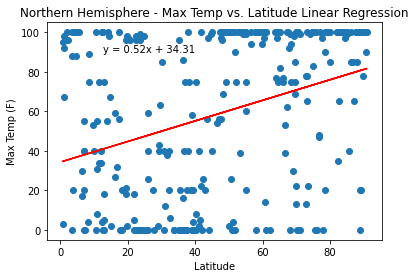

<Figure size 432x288 with 0 Axes>

In [293]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_scatter_tn , y_axis_scatter_tn )
regress_values = x_axis_scatter_tn * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis_scatter_tn,y_axis_scatter_tn)
plt.plot(x_axis_scatter_tn,regress_values,"r-")
plt.text(40,90, str(line_eq),horizontalalignment='right')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.show()
plt.savefig("../output_data/noh-temp-lat.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

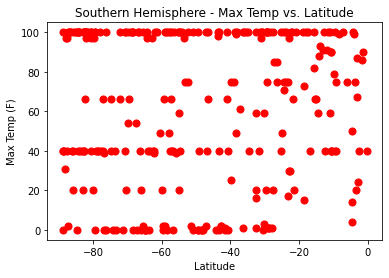

In [280]:
x_axis_scatter_ts = df_soh["Latitude"]
y_axis_scatter_ts = df_soh["Max Temp (F)"]
plt.scatter(x_axis_scatter_ts, y_axis_scatter_ts, c ="red",
            linewidths = 1, 
            edgecolor ="red", 
            s = 50)
  
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.title('Southern Hemisphere - Max Temp vs. Latitude')

plt.show()

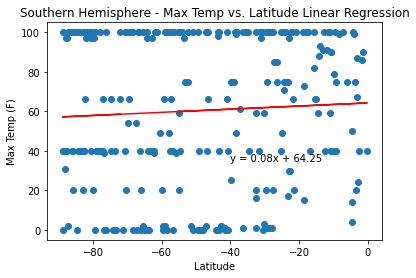

<Figure size 432x288 with 0 Axes>

In [292]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_scatter_ts , y_axis_scatter_ts )
regress_values = x_axis_scatter_ts * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis_scatter_ts,y_axis_scatter_ts)
plt.plot(x_axis_scatter_ts,regress_values,"r-")
plt.text(-40,35, str(line_eq),horizontalalignment='left')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.show()
plt.savefig("../output_data/soh-temp-lat.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

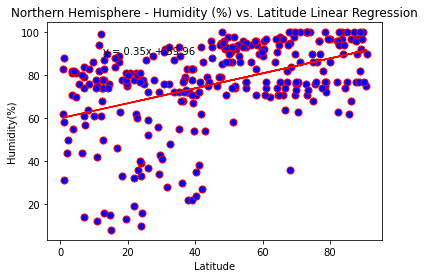

<Figure size 432x288 with 0 Axes>

In [291]:
x_axis_scatter_hn = df_noh["Latitude"]
y_axis_scatter_hn = df_noh["Humidity"]
plt.scatter(x_axis_scatter_hn, y_axis_scatter_hn, c ="blue",
            linewidths = 1, 
            edgecolor ="red", 
            s = 50)
  

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_scatter_hn , y_axis_scatter_hn )
regress_values = x_axis_scatter_hn * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_axis_scatter_hn,regress_values,"r-")
plt.text(40,90, str(line_eq),horizontalalignment='right')
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')



plt.show()
plt.savefig("../output_data/noh-hum-lat.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

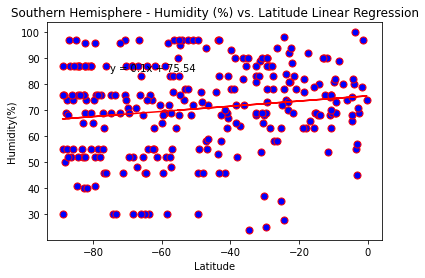

<Figure size 432x288 with 0 Axes>

In [290]:
x_axis_scatter_hs = df_soh["Latitude"]
y_axis_scatter_hs = df_soh["Humidity"]
plt.scatter(x_axis_scatter_hs, y_axis_scatter_hs, c ="blue",
            linewidths = 1, 
            edgecolor ="red", 
            s = 50)
  

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_scatter_hs , y_axis_scatter_hs )
regress_values = x_axis_scatter_hs * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_axis_scatter_hs,regress_values,"r-")
plt.text(-50,85, str(line_eq),horizontalalignment='right')
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')



plt.show()
plt.savefig("../output_data/soh-hum-lat.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

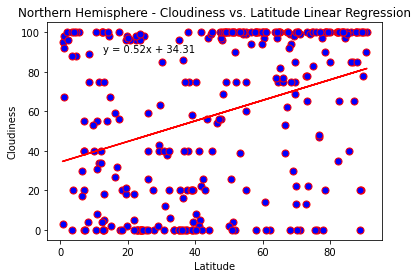

<Figure size 432x288 with 0 Axes>

In [289]:
x_axis_scatter_cn = df_noh["Latitude"]
y_axis_scatter_cn = df_noh["Cloudiness"]
plt.scatter(x_axis_scatter_cn, y_axis_scatter_cn, c ="blue",
            linewidths = 1, 
            edgecolor ="red", 
            s = 50)
  

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_scatter_cn , y_axis_scatter_cn )
regress_values = x_axis_scatter_cn * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_axis_scatter_cn,regress_values,"r-")
plt.text(40,90, str(line_eq),horizontalalignment='right')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Northern Hemisphere - Cloudiness vs. Latitude Linear Regression')



plt.show()
plt.savefig("../output_data/noh-cld-lat.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

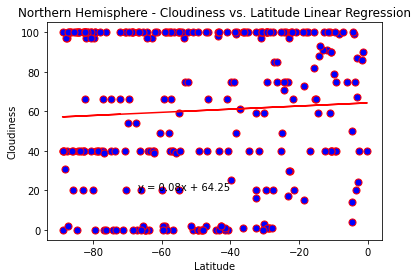

<Figure size 432x288 with 0 Axes>

In [288]:
x_axis_scatter_cs = df_soh["Latitude"]
y_axis_scatter_cs = df_soh["Cloudiness"]
plt.scatter(x_axis_scatter_cs, y_axis_scatter_cs, c ="blue",
            linewidths = 1, 
            edgecolor ="red", 
            s = 50)
  

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_scatter_cs , y_axis_scatter_cs )
regress_values = x_axis_scatter_cs * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_axis_scatter_cs,regress_values,"r-")
plt.text(-40,20, str(line_eq),horizontalalignment='right')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Northern Hemisphere - Cloudiness vs. Latitude Linear Regression')



plt.show()
plt.savefig("../output_data/soh-cld-lat.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

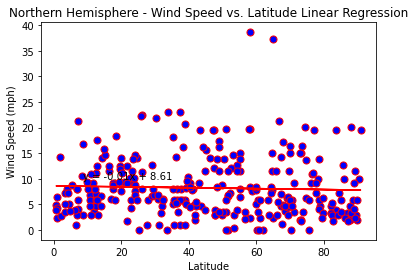

<Figure size 432x288 with 0 Axes>

In [294]:
x_axis_scatter_wn = df_noh["Latitude"]
y_axis_scatter_wn = df_noh["Wind Speed (mph)"]
plt.scatter(x_axis_scatter_wn, y_axis_scatter_wn, c ="blue",
            linewidths = 1, 
            edgecolor ="red", 
            s = 50)
  

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_scatter_wn , y_axis_scatter_wn )
regress_values = x_axis_scatter_wn * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_axis_scatter_wn,regress_values,"r-")
plt.text(35,10, str(line_eq),horizontalalignment='right')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere - Wind Speed vs. Latitude Linear Regression')



plt.show()
plt.savefig("../output_data/noh-ws-lat.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

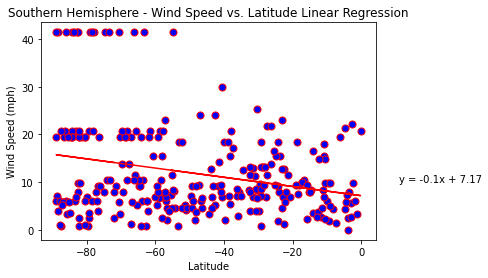

<Figure size 432x288 with 0 Axes>

In [287]:
x_axis_scatter_ws = df_soh["Latitude"]
y_axis_scatter_ws = df_soh["Wind Speed (mph)"]
plt.scatter(x_axis_scatter_ws, y_axis_scatter_ws, c ="blue",
            linewidths = 1, 
            edgecolor ="red", 
            s = 50)
  

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_scatter_ws , y_axis_scatter_ws )
regress_values = x_axis_scatter_ws * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_axis_scatter_ws,regress_values,"r-")
plt.text(35,10, str(line_eq),horizontalalignment='right')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere - Wind Speed vs. Latitude Linear Regression')



plt.show()
plt.savefig("../output_data/SOH-ws.lat.png")